In [1]:

#  Analyzing airfare prices can provide valuable insights for various stakeholders, including travelers, airlines, travel agencies, and policymakers.
#  Some reasons we may consider analyzing airfare data include: budget planning for travelers, competitive intelligence for airlines, revenue 
#  management, market research, policy decision making, economic indicators, travel industry trends, and the list goes on. Overall, analyzing
#  airfare prices is essential for understanding market dynamics, optimizing business strategies, and providing value to both travelers and 
#  industry stakeholders. Let’s dive in, and see what can be done.


In [1]:

# For reference, I used the code below to download the contents of the website I wanted to parse data from. Once the HTML is downloaded and saved as 
# a text file, it's easy to read through and figure out how the parsing will be done.

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up Selenium webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode
driver = webdriver.Chrome(options=options)  # You need to have Chrome webdriver installed

# Open the URL
url = "https://www.google.com/travel/flights/search?tfs=CBwQAhopEgoyMDI0LTA2LTAxag0IAhIJL20vMDJfMjg2cgwIAxIIL20vMGQ2bHAaKRIKMjAyNC0wNi0xNWoMCAMSCC9tLzBkNmxwcg0IAhIJL20vMDJfMjg2QAFIAXABggELCP___________wGYAQE"
driver.get(url)

# Wait for the page to load completely
wait = WebDriverWait(driver, 30)  # Increase the timeout

# Get the HTML content of the webpage
html_content = driver.page_source

# Close the webdriver
driver.quit()

# Write the HTML content to a text file
with open('C:\\Users\\ryan_\\Desktop\\webpage.txt', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("HTML content saved to 'webpage.txt'")


In [1]:

# Let's start by screen-scraping some airline pricing data.

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

# Set up Selenium WebDriver (make sure you have the appropriate WebDriver installed)
driver = webdriver.Chrome()  # Example for Chrome, you can use other browsers as well

# Open the webpage
url = 'https://www.google.com/travel/flights/search?tfs=CBwQAhopEgoyMDI0LTA2LTAxag0IAhIJL20vMDJfMjg2cgwIAxIIL20vMGQ2bHAaKRIKMjAyNC0wNi0xNWoMCAMSCC9tLzBkNmxwcg0IAhIJL20vMDJfMjg2QAFIAXABggELCP___________wGYAQE'
driver.get(url)

# Wait for the flight details to load
flight_details = WebDriverWait(driver, 10).until(
    EC.visibility_of_all_elements_located((By.CLASS_NAME, 'yR1fYc'))
)

# Scroll down to load more flights...only a few are displayed by default
while True:
    try:
        # Scroll to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Wait for a brief moment for the page to load more flights
        driver.implicitly_wait(2)
        # Check if the "Load more" button exists
        button = driver.find_element(By.CSS_SELECTOR, 'button[aria-label*="more flights"]')
        # Click the button to load more flights
        button.click()
    except NoSuchElementException:
        # If the button is not found, break the loop
        break

# Retrieve all flight details after loading more flights
flight_details = driver.find_elements(By.CLASS_NAME, 'yR1fYc')

# Loop through each flight detail element and extract necessary information
for flight in flight_details:
    try:
        # Find the span containing departure and arrival information
        span_element = flight.find_element(By.XPATH, './/span[contains(@aria-label, "Leaves")]')
        
        if span_element:
            # Extract the text containing departure and arrival information
            departure_arrival_text = span_element.get_attribute('aria-label')
            
            # Split the text to get departure and arrival date
            departure_date, arrival_date = departure_arrival_text.split(' and arrives at ')
            
            print("Departure Date:", departure_date.split(' at ')[1])
            print("Arrival Date:", arrival_date.split(' at ')[1])
        else:
            print("Departure and arrival information not found.")
        
        airline = flight.find_element(By.CSS_SELECTOR, '.sSHqwe').text
        departure_time = flight.find_element(By.CSS_SELECTOR, '[aria-label^="Departure time"]').text
        arrival_time = flight.find_element(By.CSS_SELECTOR, '[aria-label^="Arrival time"]').text
        duration = flight.find_element(By.CSS_SELECTOR, '.gvkrdb').text
        price = flight.find_element(By.CSS_SELECTOR, '[data-gs]').text
        
        print(f"Airline: {airline}")
        print(f"Departure Time: {departure_time}")
        print(f"Arrival Time: {arrival_time}")
        print(f"Duration: {duration}")
        print(f"Price: {price}")
        print("=" * 50)
    except StaleElementReferenceException:
        print("Stale element reference. Retrying...")
        continue
    except NoSuchElementException:
        print("Flight details not found.")
        continue

# Close the WebDriver
driver.quit()


Departure Date: 7:40 PM on Saturday, June 1
Arrival Date: 11:25 PM on Saturday, June 1.
Airline: Delta
Departure Time: 7:40 PM
Arrival Time: 11:25 PM
Duration: 6 hr 45 min
Price: $371
Departure Date: 8:25 PM on Saturday, June 1
Arrival Date: 12:03 AM on Sunday, June 2.
Airline: American
Departure Time: 8:25 PM
Arrival Time: 12:03 AM+1
Duration: 6 hr 38 min
Price: $371
Departure Date: 4:40 PM on Saturday, June 1
Arrival Date: 7:48 PM on Saturday, June 1.
Airline: United
Departure Time: 4:40 PM
Arrival Time: 7:48 PM
Duration: 6 hr 8 min
Price: $382
Departure Date: 10:50 PM on Saturday, June 1
Arrival Date: 8:10 AM on Sunday, June 2.
Airline: Frontier
Departure Time: 10:50 PM
Arrival Time: 8:10 AM+1
Duration: 12 hr 20 min
Price: $270
Departure Date: 6:00 AM on Saturday, June 1
Arrival Date: 11:59 PM on Saturday, June 1.
Airline: Frontier
Departure Time: 6:00 AM
Arrival Time: 11:59 PM
Duration: 20 hr 59 min
Price: $301
Departure Date: 6:05 AM on Saturday, June 1
Arrival Date: 9:29 AM on Sa

In [41]:

# Let's change the logic a bit, so we can create a dataframe and do some analysis.
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

# Set up Selenium WebDriver (make sure you have the appropriate WebDriver installed)
driver = webdriver.Chrome()  # Example for Chrome, you can use other browsers as well

# Open the webpage
url = 'https://www.google.com/travel/flights/search?tfs=CBwQAhopEgoyMDI0LTA2LTAxag0IAhIJL20vMDJfMjg2cgwIAxIIL20vMGQ2bHAaKRIKMjAyNC0wNi0xNWoMCAMSCC9tLzBkNmxwcg0IAhIJL20vMDJfMjg2QAFIAXABggELCP___________wGYAQE'
driver.get(url)

# Wait for the flight details to load
flight_details = WebDriverWait(driver, 10).until(
    EC.visibility_of_all_elements_located((By.CLASS_NAME, 'yR1fYc'))
)

# Scroll down to load more flights...only a few are displayed by default
while True:
    try:
        # Scroll to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Wait for a brief moment for the page to load more flights
        driver.implicitly_wait(2)
        # Check if the "Load more" button exists
        button = driver.find_element(By.CSS_SELECTOR, 'button[aria-label*="more flights"]')
        # Click the button to load more flights
        button.click()
    except NoSuchElementException:
        # If the button is not found, break the loop
        break

# Retrieve all flight details after loading more flights
flight_details = driver.find_elements(By.CLASS_NAME, 'yR1fYc')

# Create lists to store flight details
departure_dates = []
arrival_dates = []
airlines = []
departure_times = []
arrival_times = []
durations = []
prices = []

# Loop through each flight detail element and extract necessary information
for flight in flight_details:
    try:
        # Find the span containing departure and arrival information
        span_element = flight.find_element(By.XPATH, './/span[contains(@aria-label, "Leaves")]')
        
        if span_element:
            # Extract the text containing departure and arrival information
            departure_arrival_text = span_element.get_attribute('aria-label')
            
            # Split the text to get departure and arrival date
            departure_date, arrival_date = departure_arrival_text.split(' and arrives at ')
            
            departure_dates.append(departure_date.split(' at ')[1])
            arrival_dates.append(arrival_date.split(' at ')[1])
        else:
            departure_dates.append(None)
            arrival_dates.append(None)
        
        airlines.append(flight.find_element(By.CSS_SELECTOR, '.sSHqwe').text)
        departure_times.append(flight.find_element(By.CSS_SELECTOR, '[aria-label^="Departure time"]').text)
        arrival_times.append(flight.find_element(By.CSS_SELECTOR, '[aria-label^="Arrival time"]').text)
        durations.append(flight.find_element(By.CSS_SELECTOR, '.gvkrdb').text)
        
        try:
            prices.append(flight.find_element(By.CSS_SELECTOR, '[data-gs]').text)
        except NoSuchElementException:
            prices.append(None)
        
    except StaleElementReferenceException:
        continue
    except NoSuchElementException:
        departure_dates.append(None)
        arrival_dates.append(None)
        airlines.append(None)
        departure_times.append(None)
        arrival_times.append(None)
        durations.append(None)
        prices.append(None)

# Close the WebDriver
driver.quit()

# Filter out flights without price information
valid_indices = [i for i, price in enumerate(prices) if price is not None]
departure_dates = [departure_dates[i] for i in valid_indices]
arrival_dates = [arrival_dates[i] for i in valid_indices]
airlines = [airlines[i] for i in valid_indices]
departure_times = [departure_times[i] for i in valid_indices]
arrival_times = [arrival_times[i] for i in valid_indices]
durations = [durations[i] for i in valid_indices]
prices = [prices[i] for i in valid_indices]

# Check the lengths of the lists
print("Length of departure_dates:", len(departure_dates))
print("Length of arrival_dates:", len(arrival_dates))
print("Length of airlines:", len(airlines))
print("Length of departure_times:", len(departure_times))
print("Length of arrival_times:", len(arrival_times))
print("Length of durations:", len(durations))
print("Length of prices:", len(prices))

# Create a DataFrame with the flight details
df = pd.DataFrame({
    'Departure_Date': departure_dates,
    'Arrival_Date': arrival_dates,
    'Airline': airlines,
    'Departure_Time': departure_times,
    'Arrival_Time': arrival_times,
    'Duration': durations,
    'Price': prices
})


# Convert 'Price' column to numeric, removing any non-numeric characters
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Print the DataFrame
print(df.columns)
print(df.head())


Length of departure_dates: 252
Length of arrival_dates: 252
Length of airlines: 252
Length of departure_times: 252
Length of arrival_times: 252
Length of durations: 252
Length of prices: 252
Index(['Departure_Date', 'Arrival_Date', 'Airline', 'Departure_Time',
       'Arrival_Time', 'Duration', 'Price'],
      dtype='object')
                 Departure_Date                   Arrival_Date   Airline  \
0   4:40 PM on Saturday, June 1   7:48 PM on Saturday, June 1.    United   
1   6:05 AM on Saturday, June 1   9:29 AM on Saturday, June 1.  American   
2   7:40 PM on Saturday, June 1  11:25 PM on Saturday, June 1.     Delta   
3  10:50 PM on Saturday, June 1     8:10 AM on Sunday, June 2.  Frontier   
4   6:00 AM on Saturday, June 1  11:59 PM on Saturday, June 1.  Frontier   

  Departure_Time Arrival_Time      Duration  Price  
0        4:40 PM      7:48 PM    6 hr 8 min  382.0  
1        6:05 AM      9:29 AM   6 hr 24 min  401.0  
2        7:40 PM     11:25 PM   6 hr 45 min  454.0  
3  

In [3]:

# The first thing to notice is that average prices for different airlines are all over the place!
# Grouping by 'Airline' and calculating the mean price
average_prices = df.groupby('Airline')['Price'].mean()

# Printing the 'Airline' names and average prices together
for airline, avg_price in average_prices.items():
    print(f"Airline: {airline}, Average Price: {avg_price:.2f}")
    

Airline: Alaska, Average Price: 514.83
Airline: AlaskaOperated by SkyWest Airlines as Alaska SkyWest, Average Price: 486.50
Airline: American, Average Price: 537.56
Airline: AmericanOperated by Envoy Air as American Eagle, Average Price: 559.00
Airline: AmericanOperated by Republic Airways as American Eagle, Average Price: 530.80
Airline: AmericanOperated by Republic Airways as American Eagle, SkyWest Airlines as American Eagle, Average Price: 480.00
Airline: AmericanOperated by SkyWest Airlines as American Eagle, Average Price: 570.50
Airline: Delta, Average Price: 770.07
Airline: DeltaOperated by Endeavor Air DBA Delta Connection, Average Price: 2133.00
Airline: Frontier, Average Price: 285.50
Airline: JetBlue, Average Price: 562.38
Airline: Sun Country Airlines, Average Price: 527.00
Airline: United, Average Price: 452.49
Airline: UnitedOperated by Gojet Airlines DBA United Express, Average Price: 392.00
Airline: UnitedOperated by Mesa Airlines DBA United Express, Average Price: 578

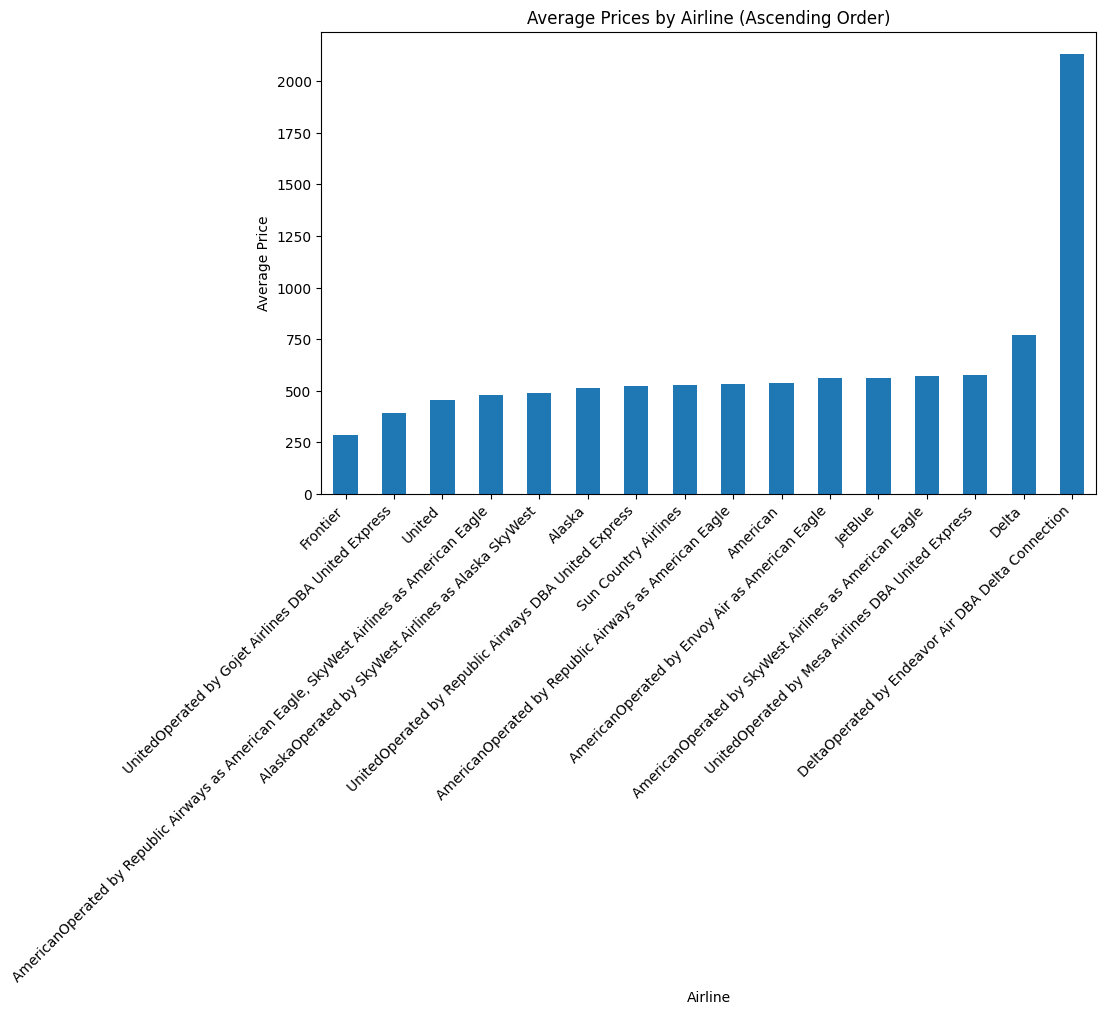

<Figure size 1000x800 with 0 Axes>

In [21]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Grouping by 'Airline' and calculating the mean price
average_prices = df.groupby('Airline')['Price'].mean()

# Sorting average_prices Series in ascending order
average_prices_sorted = average_prices.sort_values()

# Plotting the sorted average prices
plt.figure(figsize=(10, 6))
average_prices_sorted.plot(kind='bar')
plt.title('Average Prices by Airline (Ascending Order)')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(10, 8))
plt.tight_layout()
plt.show()


             Price
count   237.000000
mean    534.455696
std     196.987619
min     270.000000
25%     432.000000
50%     484.000000
75%     559.000000
max    2133.000000


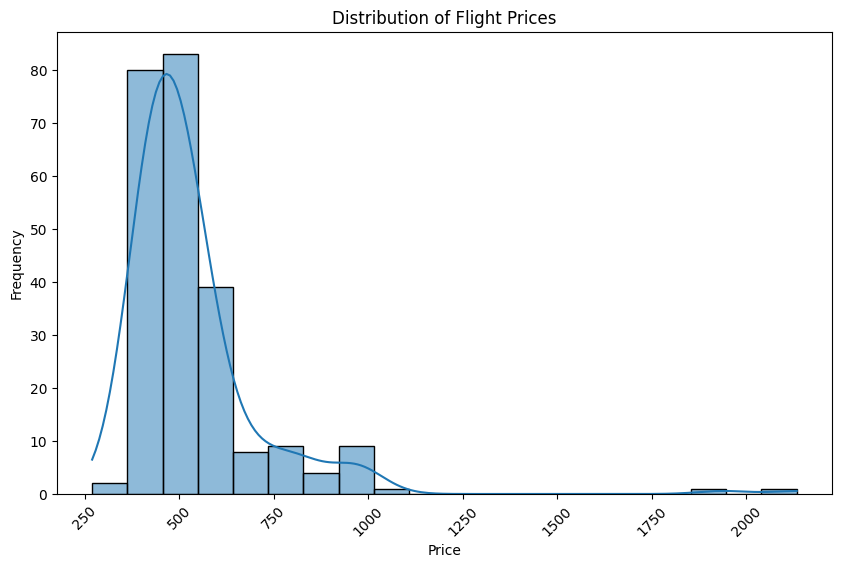

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Basic statistics
print(df.describe())

# Distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [26]:

df.head()


,Departure_Date,Arrival_Date,Airline,Departure_Time,Arrival_Time,Duration,Price,Departure_Seconds,Departure_Bin
98,"6:00 AM on Saturday, June 1","3:35 PM on Saturday, June 1.",UnitedOperated by Republic Airways DBA United ...,06:00:00,3:35 PM,12 hr 35 min,465.0,21600,05:00
83,"6:00 AM on Saturday, June 1","1:59 PM on Saturday, June 1.",United,06:00:00,1:59 PM,10 hr 59 min,460.0,21600,05:00
191,"6:00 AM on Saturday, June 1","12:29 PM on Saturday, June 1.",American,06:00:00,12:29 PM,9 hr 29 min,585.0,21600,05:00
43,"5:51 AM on Saturday, June 1","11:18 AM on Saturday, June 1.",United,05:51:00,11:18 AM,8 hr 27 min,422.0,21060,05:00
82,"6:00 AM on Saturday, June 1","12:07 PM on Saturday, June 1.",United,06:00:00,12:07 PM,9 hr 7 min,460.0,21600,05:00


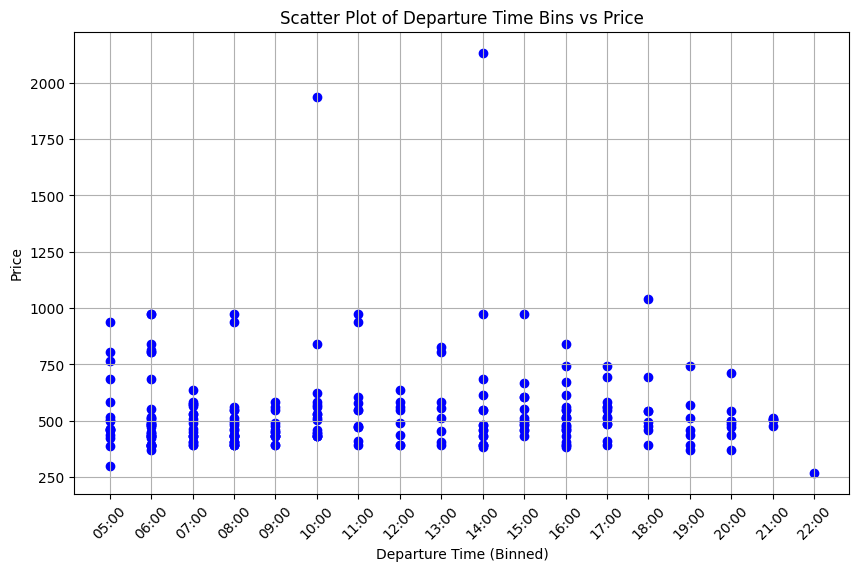

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Departure_Time' to seconds since midnight
df['Departure_Seconds'] = df['Departure_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Define the bins (e.g., 24 bins for each hour)
bins = np.linspace(0, 86400, 25)  # 24 hours * 60 minutes * 60 seconds = 86400 seconds

# Create labels for the bins
bin_labels = [f'{int(b // 3600):02}:{int((b % 3600) // 60):02}' for b in bins[:-1]]

# Bin the 'Departure_Seconds'
df['Departure_Bin'] = pd.cut(df['Departure_Seconds'], bins=bins, labels=bin_labels, include_lowest=True)

# Sort in ascending order of time
df.sort_values('Departure_Bin', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Departure_Bin'], df['Price'], color='blue')
plt.title('Scatter Plot of Departure Time Bins vs Price')
plt.xlabel('Departure Time (Binned)')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [ ]:

#  We can easily see two outliers here. What caused these prices to spike up? It could be drivedn by several factors including:

#  Demand: Flights during peak hours, such as 10 am and 2 pm, might experience higher demand, especially if they coincide with typical 
#  business travel times or popular vacation departure times. 

#  Route: The specific route of those flights could be in higher demand or have limited competition, allowing airlines to set higher prices.

#  Aircraft Type: Flights during those times might be operated by larger, more expensive aircraft, which could result in higher ticket prices.

#  Time of Booking: The outliers might be a result of last-minute bookings or booking during peak travel seasons when prices tend to be higher.

#  Special Circumstances: There could be special events, conferences, or holidays around those times, causing an increase in demand and 
#  subsequently higher prices.

#  Airlines often use dynamic pricing algorithms that take into account various factors such as demand, competition, fuel costs, and historical 
#  booking data to set prices. It's possible that the outliers are a result of the airlines' pricing strategy based on their algorithms.


In [45]:

# We need to do some Feature Engineering to create new features because this data set s quite sparse. Basically, Feature engineering is the 
# process of creating new features or modifying existing features from the raw data to improve the performance of machine learning models. 
# It involves selecting, transforming, and creating features that are most relevant and informative for the task at hand.

# Function to convert duration to total minutes
def convert_duration_to_minutes(duration):
    try:
        parts = duration.split(' ')
        hours = int(parts[0]) * 60
        minutes = int(parts[2])
        return hours + minutes
    except Exception as e:
        print(f"Error converting duration: {e}")
        return None

# Apply the function to the 'Duration' column
df['DurationMinutes'] = df['Duration'].apply(convert_duration_to_minutes)

# Clean up Arrival_Time column
df['Arrival_Time'] = df['Arrival_Time'].str.replace('\+1', '', regex=True)

# Convert Arrival_Time column to datetime
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%I:%M\u202f%p')

# Extract arrival hour
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

# Extract duration hour
df['Duration_Hour'] = df['Duration'].str.extract('(\d+) hr').astype(int)

df = df.fillna(0)
print(df.tail())


Error converting duration: list index out of range
Error converting duration: list index out of range
Error converting duration: list index out of range
Error converting duration: list index out of range
Error converting duration: list index out of range
                   Departure_Date                   Arrival_Date  \
247   2:30 PM on Saturday, June 1   9:16 PM on Saturday, June 1.   
248   3:50 PM on Saturday, June 1   9:16 PM on Saturday, June 1.   
249  12:00 PM on Saturday, June 1   5:32 PM on Saturday, June 1.   
250  10:05 AM on Saturday, June 1   1:03 PM on Saturday, June 1.   
251   2:34 PM on Saturday, June 1  10:02 PM on Saturday, June 1.   

                                               Airline      Departure_Time  \
247                                              Delta 2024-05-15 14:30:00   
248                                              Delta 2024-05-15 15:50:00   
249                                              Delta 2024-05-15 12:00:00   
250                     

In [38]:

# So, what kinds of predictive analytics can we do at this point? Let's test some ideas!
# We can run a simple regression process and check the results.

# Price Analysis and Prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


# Prepare data for modeling
X = df[['DurationMinutes', 'Duration_Hour', 'Arrival_Hour']]
X = pd.get_dummies(X, columns=['Duration_Hour', 'Arrival_Hour'], drop_first=True)
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Absolute Error:", mae)


R^2 Score: 0.03740828503943361
Mean Absolute Error: 98.07298090277777


In [ ]:

#  R^2 Score (Coefficient of Determination): It measures the proportion of the variance in the dependent variable (target) that is predictable 
#  from the independent variables (features) in the model. R^2 score ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that 
#  the model does not explain any of the variability in the target variable. In your case, an R^2 score of 0.0374 indicates that only 3.74% of 
#  the variance in the target variable is explained by the independent variables in the model.

#  Mean Absolute Error (MAE): It measures the average absolute difference between the predicted values and the actual values. It gives an idea 
#  of how close the predictions are to the actual values on average. A lower MAE indicates better performance of the model. In your case, an MAE 
#  of 98.07 means that, on average, the predicted values are off by approximately 98.07 units from the actual values.

# I was thing that, just perhaps, 'DurationMinutes', 'Duration_Hour', 'Arrival_Hour' have some impact on the price of flights.
# These variable have no influence, whatsoever, on prices!! We would need an R^2 of al least 70%, or higher, to be considered statistically significant.


In [42]:

# What other kinds of analysis can we do???
# Segmentation Analysis (a.k.a. Clustering)
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

# Create a new column for flight timing segment
df['Flight_Timing'] = pd.cut(df['Departure_Time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Display the segmented data
print(df[['Departure_Time', 'Flight_Timing']])


         Departure_Time Flight_Timing
0   2024-05-15 16:40:00     Afternoon
1   2024-05-15 06:05:00         Night
2   2024-05-15 19:40:00       Evening
3   2024-05-15 22:50:00       Evening
4   2024-05-15 06:00:00         Night
5   2024-05-15 06:54:00         Night
6   2024-05-15 07:45:00       Morning
7   2024-05-15 09:02:00       Morning
8   2024-05-15 09:02:00       Morning
9   2024-05-15 05:51:00         Night
10  2024-05-15 06:25:00         Night
11  2024-05-15 06:25:00         Night
12  2024-05-15 06:04:00         Night
13  2024-05-15 06:04:00         Night
14  2024-05-15 06:40:00         Night
15  2024-05-15 06:40:00         Night
16  2024-05-15 07:10:00       Morning
17  2024-05-15 08:00:00       Morning
18  2024-05-15 08:19:00       Morning
19  2024-05-15 08:30:00       Morning
20  2024-05-15 08:30:00       Morning
21  2024-05-15 09:55:00       Morning
22  2024-05-15 09:55:00       Morning
23  2024-05-15 11:25:00       Morning
24  2024-05-15 13:00:00     Afternoon
25  2024-05-

In [43]:

# Preference Segmentation
# Group customers based on their preferred airline
airline_preference = df.groupby('Airline').size().reset_index(name='Count')

# Display the segmented data
print(airline_preference)


                                              Airline  Count
0                                              Alaska     13
1   AlaskaOperated by SkyWest Airlines as Alaska S...      3
2                                            American     69
3     AmericanOperated by Envoy Air as American Eagle      1
4   AmericanOperated by Republic Airways as Americ...      7
5   AmericanOperated by Republic Airways as Americ...      4
6   AmericanOperated by SkyWest Airlines as Americ...      8
7                                               Delta     28
8   DeltaOperated by Endeavor Air DBA Delta Connec...      1
9                                            Frontier      2
10                                            JetBlue      8
11                               Sun Country Airlines      2
12                                             United     92
13  UnitedOperated by Gojet Airlines DBA United Ex...      2
14  UnitedOperated by Mesa Airlines DBA United Exp...      2
15  UnitedOperated by Re

In [46]:

# Duration of Flight Segmentation
# Create a new column for duration of flight segment
df['Flight_Duration'] = pd.cut(df['Duration_Hour'], bins=[0, 5, 10, float('inf')], labels=['Short', 'Medium', 'Long'])

# Display the segmented data
print(df[['Duration_Hour', 'Flight_Duration']])


     Duration_Hour Flight_Duration
0                6          Medium
1                6          Medium
2                6          Medium
3               12            Long
4               20            Long
5               17            Long
6               16            Long
7               14            Long
8               16            Long
9               14            Long
10              13            Long
11              15            Long
12               9          Medium
13              10          Medium
14               8          Medium
15              10          Medium
16               9          Medium
17              10          Medium
18               8          Medium
19               8          Medium
20              10          Medium
21               8          Medium
22              10          Medium
23               9          Medium
24              10          Medium
25              10          Medium
26               9          Medium
27               8  

In [47]:

# Price Sensitivity Segmentation
# Create a new column for price sensitivity segment
df['Price_Sensitivity'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

# Display the segmented data
print(df[['Price', 'Price_Sensitivity']])


      Price Price_Sensitivity
0     382.0               Low
1     401.0               Low
2     454.0            Medium
3     270.0               Low
4     301.0               Low
5     381.0               Low
6     381.0               Low
7     381.0               Low
8     381.0               Low
9     389.0               Low
10    389.0               Low
11    389.0               Low
12    392.0               Low
13    392.0               Low
14    392.0               Low
15    392.0               Low
16    392.0               Low
17    392.0               Low
18    392.0               Low
19    392.0               Low
20    392.0               Low
21    392.0               Low
22    392.0               Low
23    392.0               Low
24    392.0               Low
25    392.0               Low
26    392.0               Low
27    392.0               Low
28    392.0               Low
29    392.0               Low
30    392.0               Low
31    392.0               Low
32    392.

In [49]:

# Arline Comparison
# Grouping by airline and counting the number of flights for each airline
airline_comparison = df.groupby('Airline').size().reset_index(name='Number_of_Flights')

# Displaying the airline comparison
print(airline_comparison)


                                              Airline  Number_of_Flights
0                                              Alaska                 13
1   AlaskaOperated by SkyWest Airlines as Alaska S...                  3
2                                            American                 69
3     AmericanOperated by Envoy Air as American Eagle                  1
4   AmericanOperated by Republic Airways as Americ...                  7
5   AmericanOperated by Republic Airways as Americ...                  4
6   AmericanOperated by SkyWest Airlines as Americ...                  8
7                                               Delta                 28
8   DeltaOperated by Endeavor Air DBA Delta Connec...                  1
9                                            Frontier                  2
10                                            JetBlue                  8
11                               Sun Country Airlines                  2
12                                             Unit

In [50]:

# Price Comparison
# Calculating average price for each airline
price_comparison = df.groupby('Airline')['Price'].mean().reset_index()

# Displaying the price comparison
print(price_comparison)


                                              Airline        Price
0                                              Alaska   550.923077
1   AlaskaOperated by SkyWest Airlines as Alaska S...   533.000000
2                                            American   517.565217
3     AmericanOperated by Envoy Air as American Eagle   559.000000
4   AmericanOperated by Republic Airways as Americ...   453.142857
5   AmericanOperated by Republic Airways as Americ...   448.500000
6   AmericanOperated by SkyWest Airlines as Americ...   563.375000
7                                               Delta   839.714286
8   DeltaOperated by Endeavor Air DBA Delta Connec...  2102.000000
9                                            Frontier   285.500000
10                                            JetBlue   576.875000
11                               Sun Country Airlines   542.000000
12                                             United   459.010870
13  UnitedOperated by Gojet Airlines DBA United Ex...   392.00

In [51]:

# Schedule Comparison
# Grouping by departure hour and counting the number of flights for each hour
schedule_comparison = df.groupby(df['Departure_Time'].dt.hour)['Airline'].count().reset_index(name='Number_of_Flights')

# Displaying the schedule comparison
print(schedule_comparison)


    Departure_Time  Number_of_Flights
0                5                  2
1                6                 41
2                7                 20
3                8                 24
4                9                 20
5               10                 17
6               11                 12
7               12                  7
8               13                 11
9               14                 14
10              15                 20
11              16                 19
12              17                 13
13              18                  8
14              19                  6
15              20                 10
16              21                  7
17              22                  1


In [52]:

# Market Share Analysis
# Calculating market share for each airline
market_share = (df.groupby('Airline').size() / len(df)) * 100

# Displaying the market share analysis
print(market_share)


Airline
Alaska                                                                                         5.158730
AlaskaOperated by SkyWest Airlines as Alaska SkyWest                                           1.190476
American                                                                                      27.380952
AmericanOperated by Envoy Air as American Eagle                                                0.396825
AmericanOperated by Republic Airways as American Eagle                                         2.777778
AmericanOperated by Republic Airways as American Eagle, SkyWest Airlines as American Eagle     1.587302
AmericanOperated by SkyWest Airlines as American Eagle                                         3.174603
Delta                                                                                         11.111111
DeltaOperated by Endeavor Air DBA Delta Connection                                             0.396825
Frontier                                                

In [ ]:

######################################################################
# Demand Forecasting
# Demand forecasting typically relies on historical data to predict future demand for a product or 
# service. While your dataframe contains flight information such as departure and arrival times, 
# airline, duration, and price, it doesn't include any historical data on passenger demand.
# To perform demand forecasting, you would typically need data on past bookings or ticket sales 
# for similar flights, possibly including factors such as time of year, day of the week, holidays, 
# special events, and other variables that could influence demand.


In [ ]:

######################################################################
# Furthermore, we could normally do some kind of price optimization, route optimization, operational
# efficiency capacity management, analyze promotions and discounts, sentiment analysis, environmental
# impact analysis, service comparison, etc. However, we don't have these features available in the 
# specific data set, so we woill not be able to do these types of analytics.


In [ ]:

# END!!!
